# ch07-2 심층 신경망

인공 신경망의 성능을 더 높이기 위해  

## 1. 2개의 층


In [29]:
import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

그다음 이미지의 픽셀값을 0〜255 범위에서 0〜1 사이로 변환하고, 28 x 28 크기의 2차원 배열을 
784 크기의 1차원 배열로 펼칩니다. 마지막으로 사이킷런의 train_test_split() 함수로 훈련 세트 
와 검증 세트로 나눕니다. 여기까지는 1절에서 했던 것과 같습니다. 

In [30]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

인공 신경망 모델에 2개 층을 추가해보기      
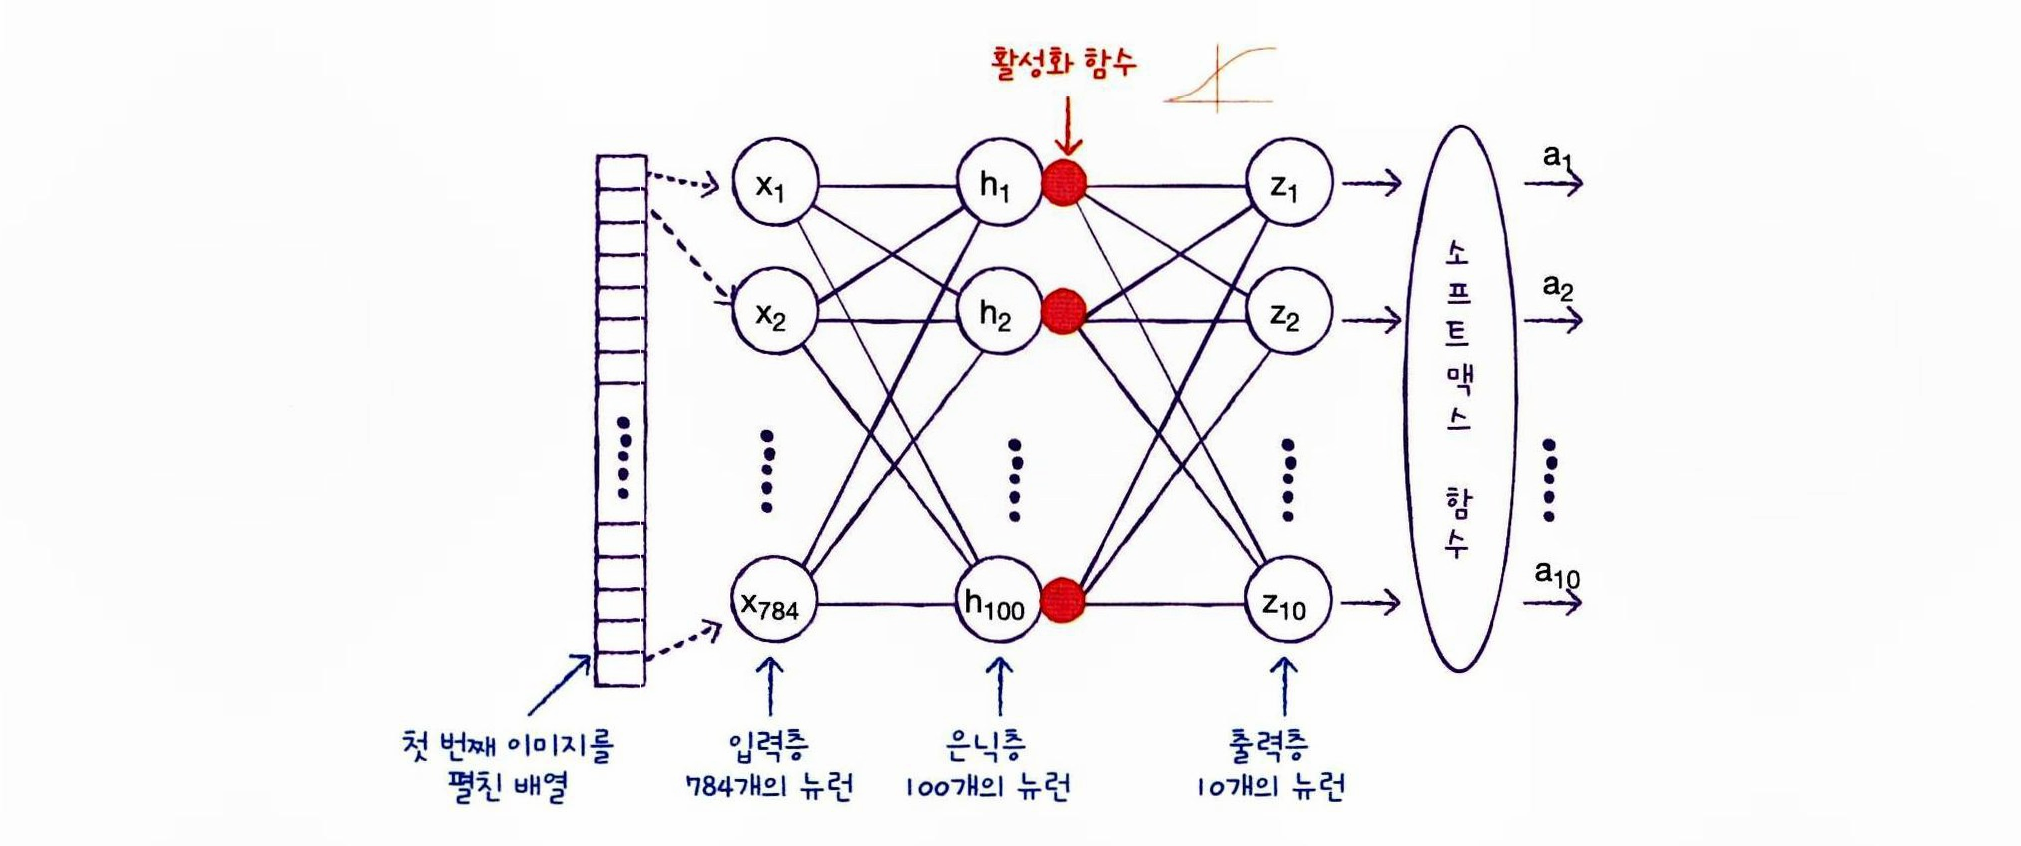

입력층과 출력층 사이에 밀집층을 추가 = **은닉층 hidden layers**     

**활성화 함수**         
= 신경망 층의 선형 방정식의 계싼 값에 적용하는 함수  (softmax같은)      
- 출력층에 적용하는 활성화 함수는 종류가 제한되어 있으나      
- 은닉층에 사용하는 활성화 함수는 비교적 자유롭게 사용 가능     
e.g. 시그모이드 함수, 볼레루 함수 등    


**왜 활성화 함수를 사용할까?**      
1. a x 4 + 2 = b        
    b x 3 - 5 = c       
    a x 12 + 1 = c      

이렇게 b 의 역할이 사라지는 것과 같이       

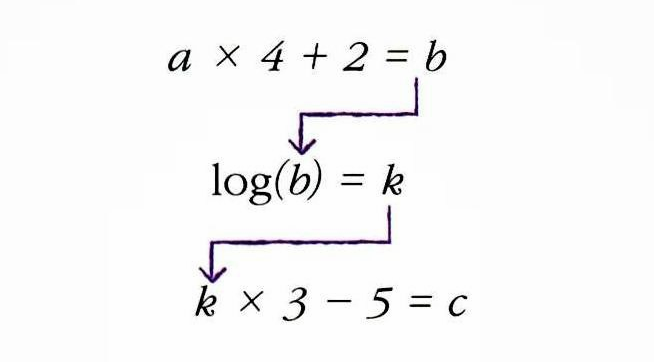

이렇게 은닉층에서 선형적인 산술 계산만 수행하면, 수행 역할이 없는 셈              
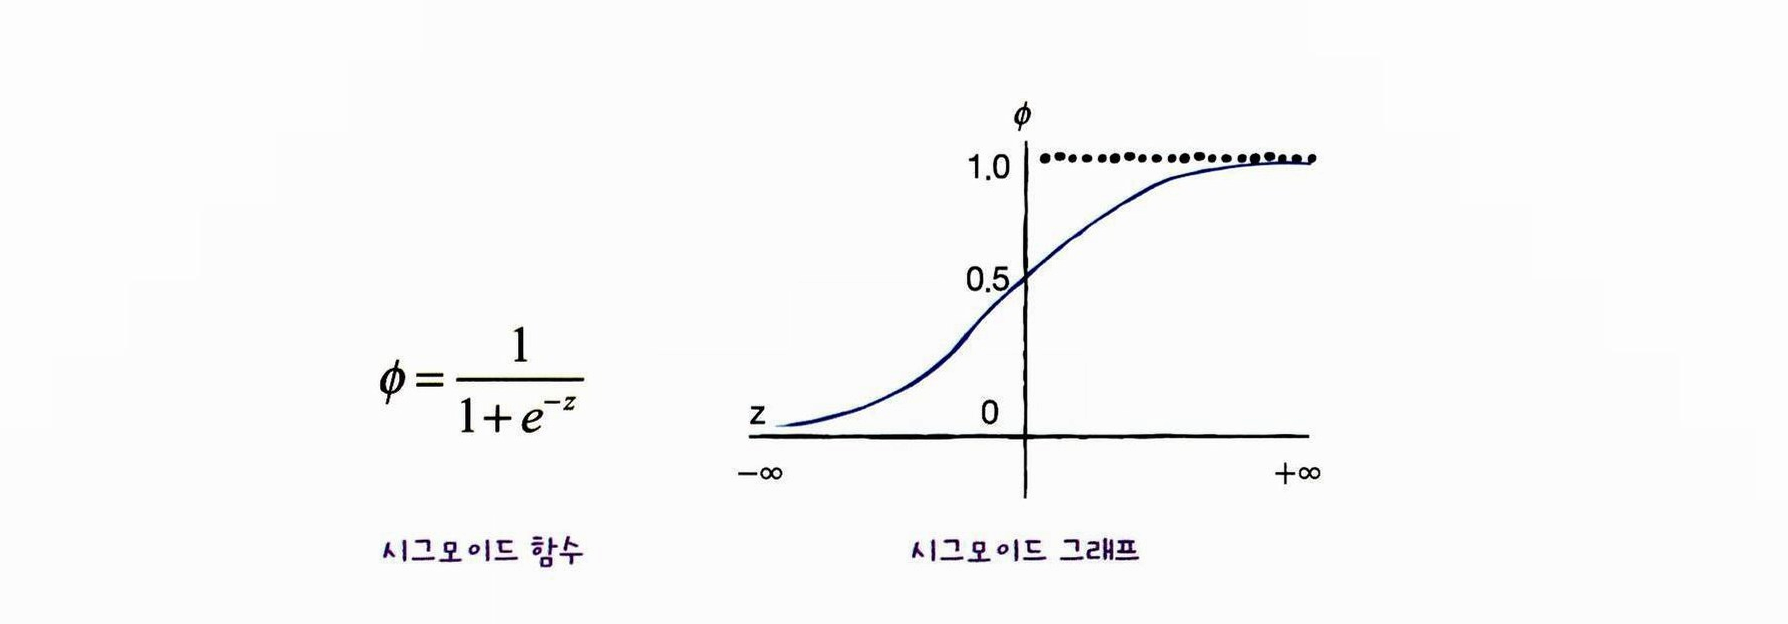

In [31]:
inputs = keras.layers.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='sigmoid') #은닉층, 100개의 뉴런을 가진 밀집층
dense2 = keras.layers.Dense(10, activation='softmax') #출력층, 10개의 클래스를 분류하므로 10개의 뉴런, 활성화함수는 소프프맥스

dense1에서 뉴런의 개수는 경험적으로 선택할 수 있으나, 한 가지 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야 함        
클래스 10개에 대한 확률을 예측할 때, 이전 은닉층의 뉴런이 10개보다 적다면 부족한 정보가 전달될 것임     

## 2. 심층 신경망 만들기

inputs, dense1, dense2 객체를 sequential 클래스에 추가하여 **심층 신경망 deep neural network, DNN** 을 만들어보기

In [32]:
model = keras.Sequential([inputs, dense1, dense2]) #입력층, 은닉층1, 은닉층n, 출력층 순으로 배치하면 됨

In [33]:
model.summary() 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

모델 이름, 층 이름, 클래스, 출력 크기, 모델 파라미터 개수 가 출력됨     
층을 만들 때 name 매개변수로 이름을 지정할 수 있으나 지정하지 않으면 dense라고 붙임     

**Output shape**        
(None, 100) 첫번째 차원은 샘플의 개수, 샘플의 개수가 아직 정의되어있지 않으므로 None        
keras model 의 fit() 매서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러번 걸쳐 경사 하강법 단계를 수행     
= 미니 배치 경사 하강법     

케라스의 기본 미니 배치 크기는 32개         
fit() 메서드에서 batch_size 매개변수로 바꿀 수 있음     
따라서, 샘플 개수를 고정하지 않고, 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정    

두 번째 차원은 출력의 개수 (특성의 개수)  

모델 파라 미터 개수
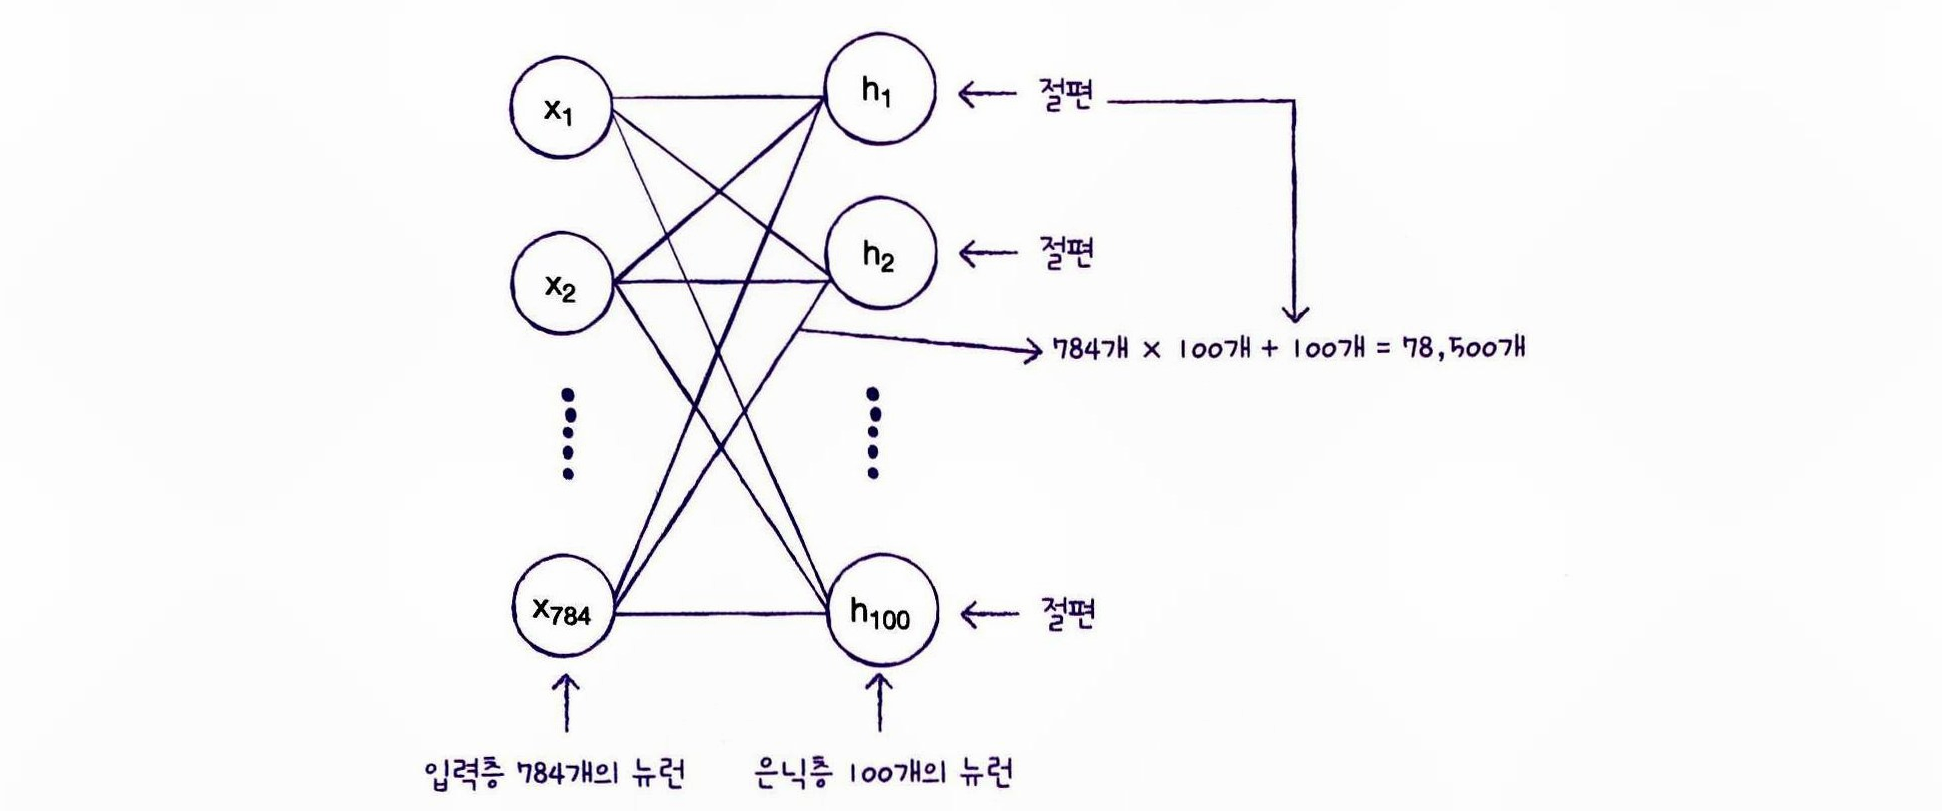
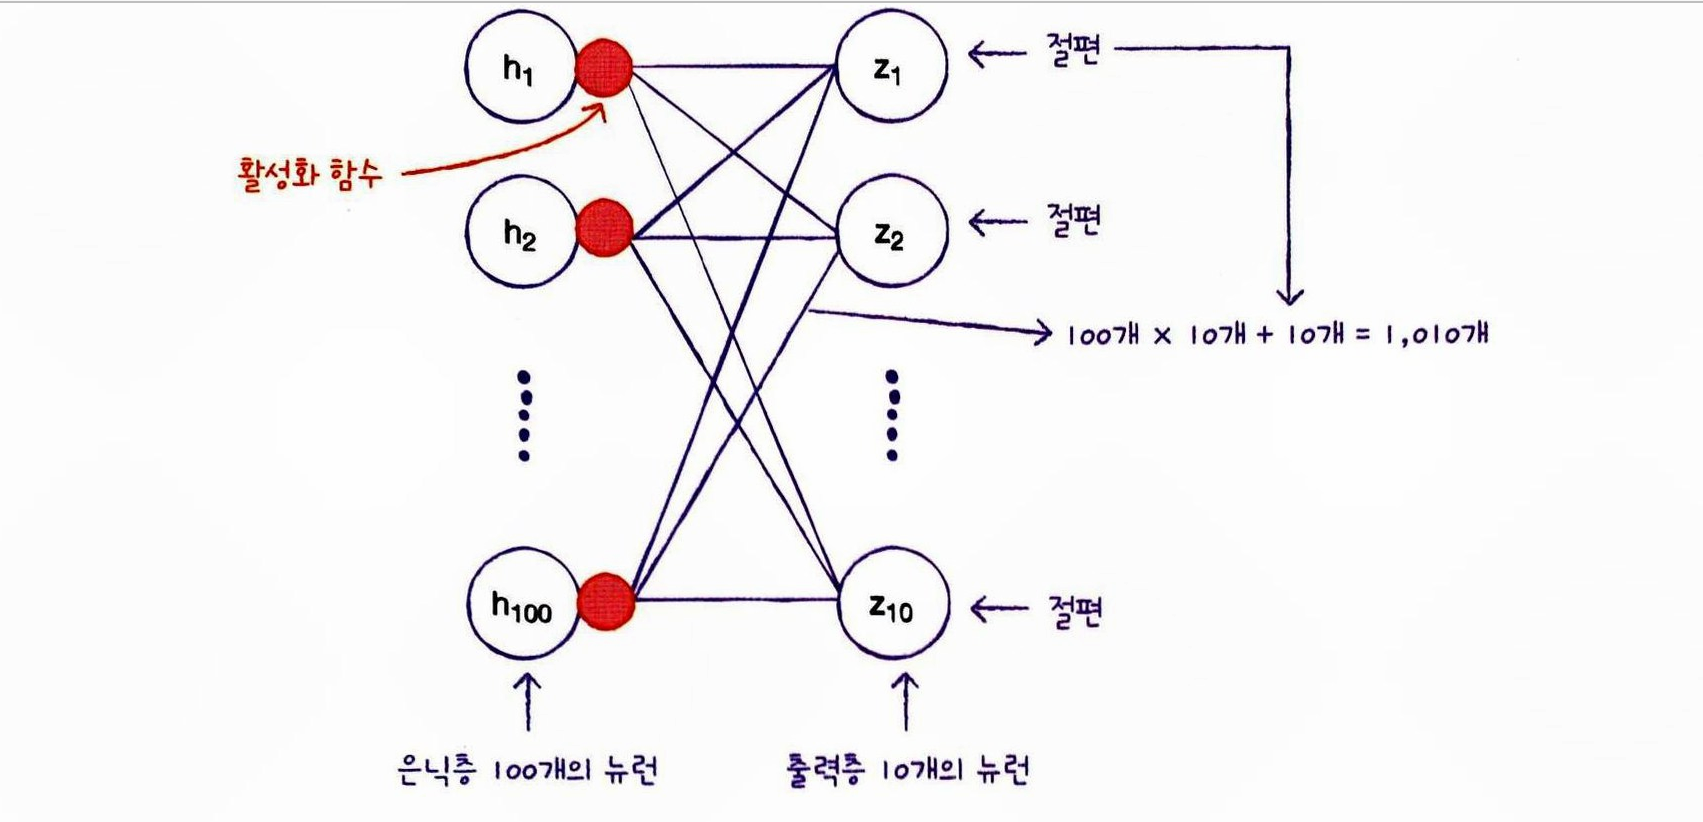

## 3. 층을 추가하는 다른 방법

sequential 클래스에 inputs, dense1, dense2 만들어 전달하는 방법 외에
sequential 클래으의 생성자 안에서 바로 클래스의 객체를 만듦         

In [34]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='sigmoid', name='은닉층'),
    keras.layers.Dense(10, activation='softmax', name='출력층')
], name='패션 MNIST 모델')

In [35]:
model.summary() 

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 은닉층 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 출력층 (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

그러나 이 방법 역시, SEQUENTIAL 클래스 생성자가 매우 길어지고, 조건에 따라 층을 추가할 수 없음      

Sequential 클래스에서 층을 추가할 때 가장 널리 사용하는 방법은 모델의 `add()` 메서드    

In [36]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [37]:
model.summary() 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#위 모델로 훈련하기
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7511 - loss: 0.7722
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8467 - loss: 0.4271
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8627 - loss: 0.3829
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8704 - loss: 0.3559
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8762 - loss: 0.3402


## 3. 렐루 함수  - 이미지 분류에서 높은 성능을 낼 수 있는 활성화 함수

- 시그모이드 함수는 양 끝으로 갈 수록 그래프가 누워있기 대문에 올바른 출력을 만드는데 신속하지 못함   
- 특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 함   

**렐루 ReLU**       
입력이 양수일 경우 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고, 음수일 경우에는 0으로 만듦         
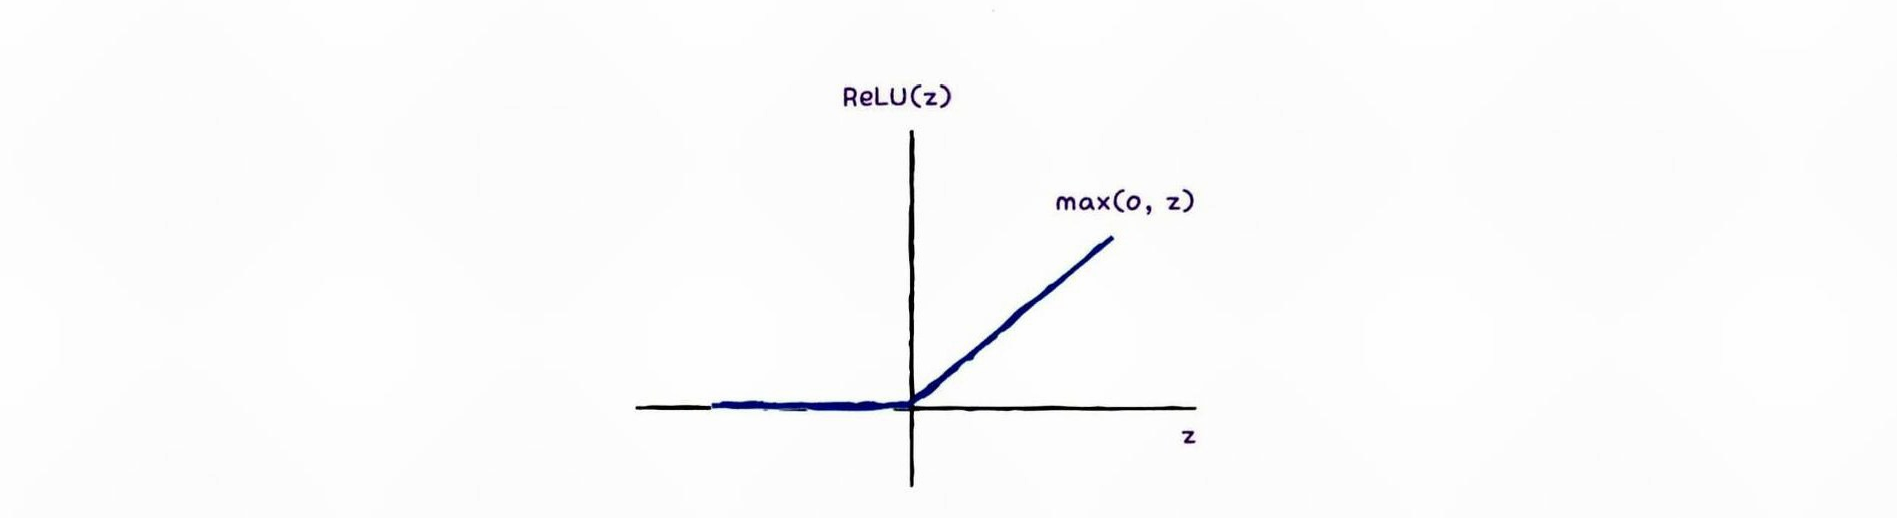


max(0,z)와 같이 쓰는데, z가 0보다 크면 z를 출력. z가 0보다 작으면 0을 출력      

특히 이미지 처리에 유리 

**Flatten 클래스**      
배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할     
입력에 곱해지는 가중치나 절편이 없으므로 인공 신경망의 성능에 기여하는 바는 없음        
그러나, 입력층과 은닉층 사이에 추가하므로 그냥 층이라고 부름        

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28))) #1차원으로 만든 784가 아니라 원본 이미지 크기로 지정   
model.add(keras.layers.Flatten()) #flatten 층이 1차원으로 펼쳐줄 것이므로 입력층에는 2차원 입력을 받겠다는 의미 
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [39]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,022 (621.18 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 79,512 (310.60 KB)

첫 번째 등장하는 Flatten 클래스에 포함된 모델 파라미터는 0개        
Flatten 층을 신경망에 추가하면 입력값의 차원을 짐작할 수 있는 장점이 있다.      

In [40]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
) #reshape 활용하지 않고 

In [41]:
#컴파일, 훈련은 동일
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 28, 28), dtype=float32). Expected shape (None, 784), but input has incompatible shape (32, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28), dtype=float32)
  • training=True
  • mask=None

시그모이드보다 조금 향상된 결과

In [ ]:
model.evaluate(val_scaled, val_target) #검증세트 성능 확인

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8748 - loss: 0.3597


[0.3641495406627655, 0.8732500076293945]

## 4. 옵티마이저

신경망에 특히 하이퍼파라미터(모델이 학습하지 않아 사람이 지정해야하는 파라미터)가 많다.       
- 추가할 은닉층의 수    
- 은닉층의 뉴런 개수    
- 활성화 함수   
- 층의 종류 
- 미니배치의 사이즈 
- epochs 수     
- RMSprop의 학습률      

**옵티마이저**      
다양한 종류의 경사 하강법 알고리즘      


In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

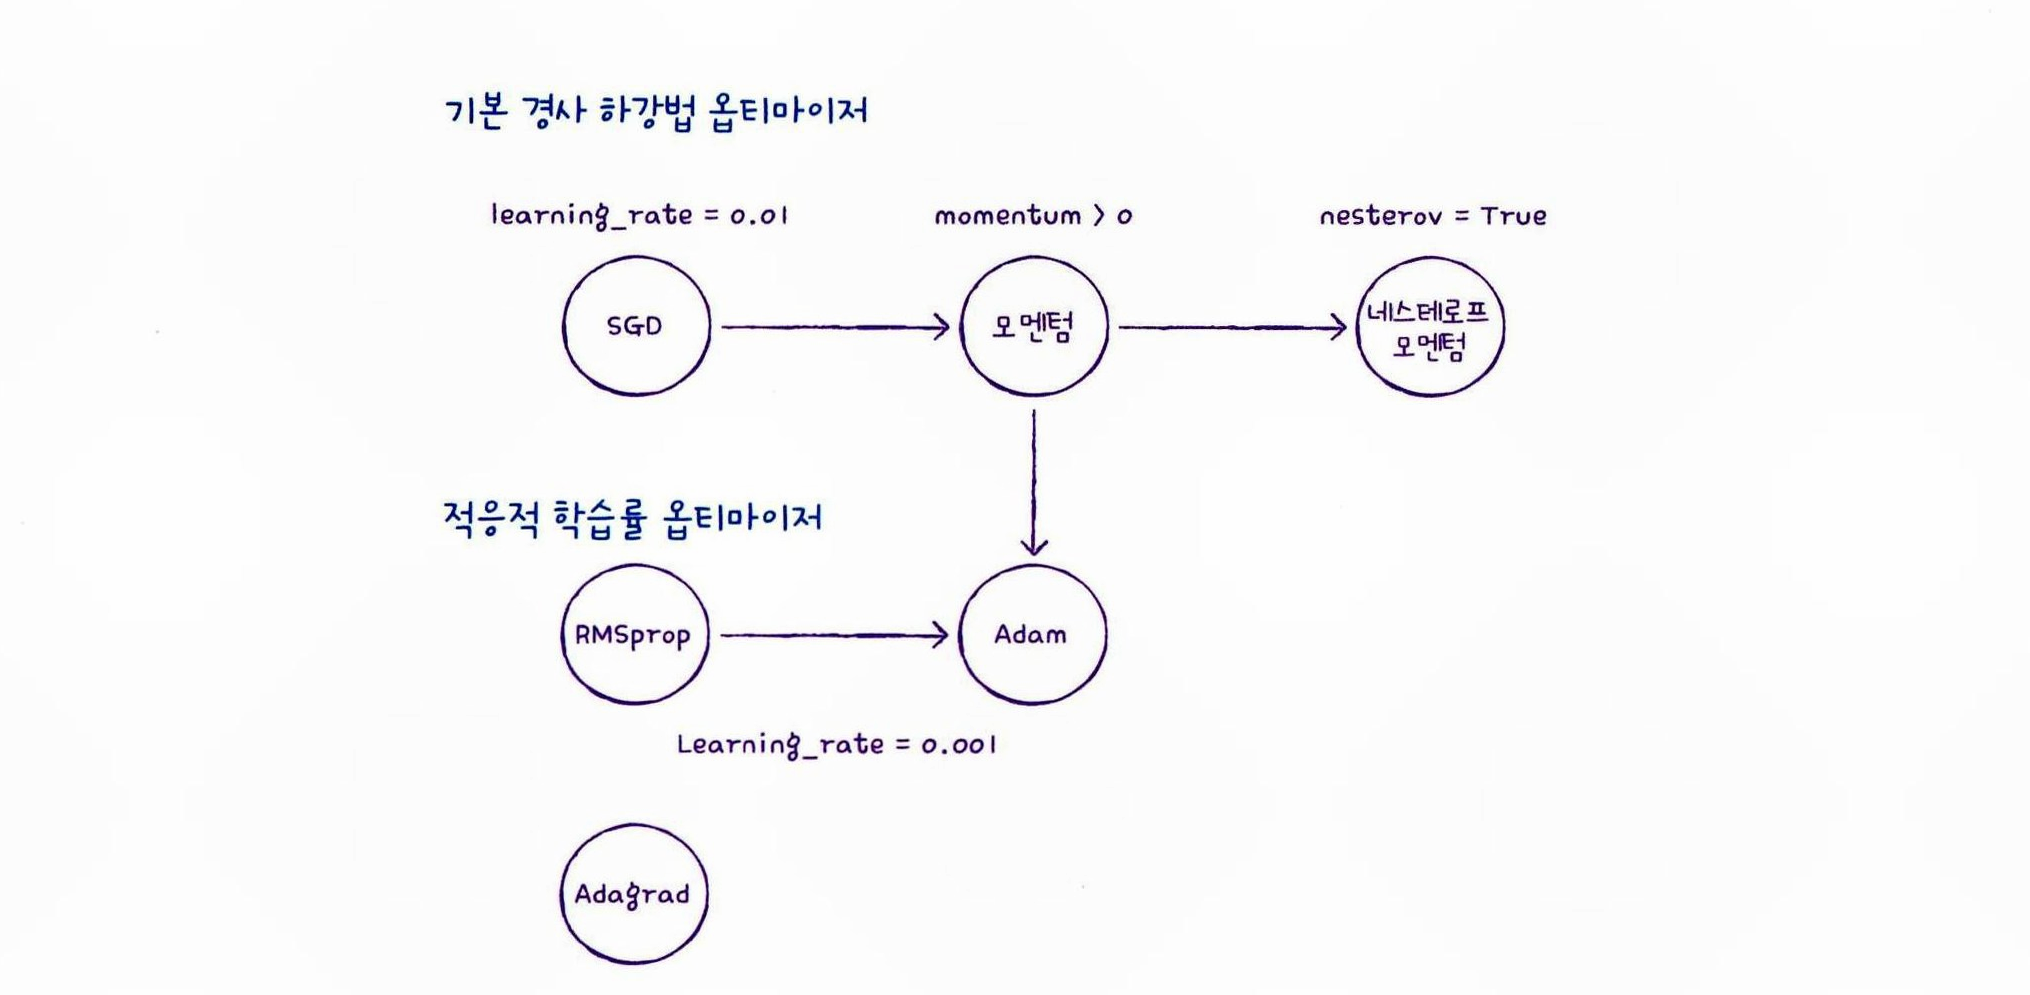

기본 경사 하강법 옵티마이저는 모두 SGD 클래스에서 제공      
SGD 클래스의 momentum 매개변수의 기본값은 0     
이를 0보다 큰 값으로 지정하면 이전 그레디언트 가속도처럼 사용하는 **momentum optimization**     
보통 momentum 매개변수는 0.9이상을 지정     

In [ ]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) #True로 바꾸면 네스테로프 모멘텀 최적화

네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다   

모델이 최적점에 가까이 갈 수록 학습률을 낮출 수 있다.       
= **적응적 학습률 adaptive learning rate**      

적응적 학습률을 사용하는 대표적인 옵티마이저 = Adagrad 와 RMSprop       
각각 compile() 의 optimizer 매개변수에 `'adagrad'`와 `'rmsprop'`로 지정할 수 잇음       

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

모멘텀 최적화와 RMSpropO 장점을 접목한 것이 Adam입니다. Adam은 RMSprop과 함께 맨처 
음 시도해 볼 수 있는 좋은 알고리즘입니다. Adam 클래스도 keras.optimizers 패키지 아래에 있 
습니다. 적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 
0.001 을사용합니다.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7679 - loss: 0.6558
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8555 - loss: 0.4007
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8737 - loss: 0.3524
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8796 - loss: 0.3255
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8885 - loss: 0.3019


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8766 - loss: 0.3522


[0.34775322675704956, 0.875083327293396]

Keras

 • `add ()`는 케라스 모델에 층을 추가하는 메서드입니다.     
케라스 모델의 add() 메서드는 keras.layers 패키지 아래에 있는 층의 객체를 입력받아 신경망 모델에 추가합니다.         
add() 메서드를 호출하여 전달한 순서대로 층이 차례대로 늘어납니다.       
 • `summary ()`는 케라스 모델의 정보를 출력하는 메서드입니다.       
모델에 추가된 층의 종류와 순서, 모델 파라미터 개수를 출력합니다. 
층을 만들 때 name 매개 변수로 이름을 지정하면 summary () 메서드 출력에서 구분하기 쉽습니다.     
 • SGD는 기본 경사 하강법 옵티마이저 클래스입니다.      
 learning_rate 매개변수로 학습률을 지정하며 기본값은 0.()1 입니다.      
 momentum 매개변수에 0 이상의 값을 지정하면 모멘텀 최적화를 수행합니다.     
 nesterov 매개변수를 True로 설정하면 네스테로프 모멘텀 최적화를 수행합니다.     

• Adagrad는 옵티마이저 클래스입니다.        
 learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001 입니다.      
 Adagrad는 그레이디언트 제곱을 누적하여 학습률을 나눕니다. initial_accumulator_value 매개변수에서 누적 초깃값을 지정할수 있으며 기본값은0.1입니다.      
 • RMSprop은 RMSprop 옵티마이저 클래스입니다.       
 learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001 입니다.      
 Adagrad처럼 그레이디언트 제곱으로 학습률을 나누지만 최근의 그레이디언트를 사용하기 위해 지수 감소를 사용합니다.        
 rho 매개변수에서 감소 비율을 지정하며 기본값은 0.9입니다.      
 • Adam은 Adam 옵티 마이 저 클래스입니다.       
 learning_rate 매개변수로 학습률을 지정하며 기본값은 0.001입니다.       
모멘텀 최적화에 있는 그레이디언트의 지수 감소 평균을 조절하기 위해 beta_l 매개변수가 있으며 기본값은 0.9입니다.     
 RMSprop에 있는 그레이디언트 제곱의 지수 감소 평균을 조절하기 위해 beta_2 매개변수가 있으며 기본값은 0.999입니다        